In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Housing.csv')

In [22]:
# Input variables

area = df.values[:,1] #get area
bedrooms = df.values[:,2] #get bedrooms
bathrooms = df.values[:,3] #get bathrooms
stories = df.values[:,4] #get stories
mainroad = df.values[:,5] #get mainroad
guestroom = df.values[:,6] #get guestroom
basement = df.values[:,7] #get basement
hotwater = df.values[:,8] #get hotwaterheating
aircondition = df.values[:,9] #get airconditioning
parking = df.values[:,10] #get parking
prefarea = df.values[:,11]#get prefarea

y = df.values[:,0] #get Dependent variable Y Price

# Length of Y

m = len(y)

#(df['price']-df['price'].min())/(df['price'].max()-df['price'].min())
#(df['area']-df['area'].min())/(df['area'].max()-df['area'].min())

In [23]:
# Input Normalization 

def normalization(value):
    x =(value-value.min())/(value.max()-value.min())
    return x

In [24]:
# Input Standardization 

def standardized(value):
    x =(value-value.mean())/(value.std())
    return x

In [25]:
# Input selection 

X1 = normalization(bedrooms)
y = normalization(y)


Text(0.5, 1.0, 'Scatter plot of training data')

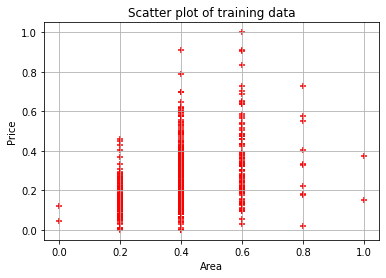

In [26]:
# Data Plot

plt.scatter(X1,y, color='red', marker='+')
plt.grid()
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter plot of training data')

In [27]:
# Matrixs of ones

X_0 = np.ones((m,1))
theta = np.zeros(2)
reg = 5


In [28]:
# Converting 1D array to 2D array with length Y

X_1 = X1.reshape((m, 1))
X1=np.hstack((X_0,X_1))

In [29]:
# Cost function 

def compute_cost(X,y,theta):
    prediction = X.dot(theta)
    errors = np.subtract(prediction, y)
    sqrErrors = np.square(errors)
    
    
    J = 1/(2*m) * np.sum(sqrErrors)
    
    return J

In [30]:
# Cost function with parameters penalty 

def compute_cost_reg(X,y,theta, reg):
    prediction = X.dot(theta)
    errors = np.subtract(prediction, y)
    sqrErrors = np.square(errors)    
    
    
    J = 1/(2*m) * (np.sum(sqrErrors) + reg*np.sum(np.square(theta)))
    
    return J

In [31]:
# Cost for theta values 

cost = compute_cost_reg(X1,y,theta, reg)
print('The cost for given values of theta_0 and theta_1 =', cost)


The cost for given values of theta_0 and theta_1 = 0.047198442166923524


In [32]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        # Cost history with parameters penalty 
        cost_history[i] = compute_cost_reg(X, y, theta, reg)
    
    return theta, cost_history


In [33]:
# Parameters

theta = [0., 0.]
iterations = 1500;
alpha = 0.09;

In [34]:
theta, cost_history = gradient_descent(X1, y, theta, alpha, iterations)
print('Final value of theta =', theta)

Final value of theta = [0.11299371169445978 0.3775300465417338]


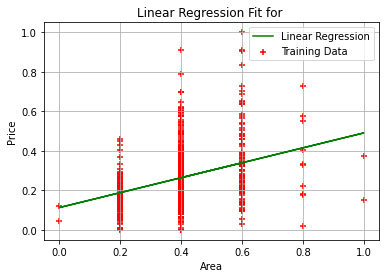

In [35]:
plt.scatter(X1[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X1[:,1],X1.dot(theta), color='green', label='Linear Regression')
plt.grid()
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Fit for ')
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

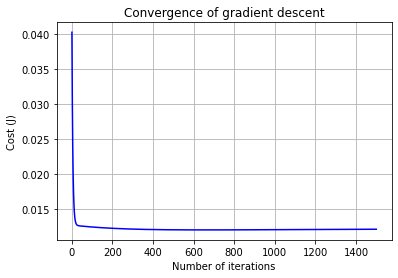

In [36]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
#plt.xlim(0, 20)
plt.grid() 
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent')